In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
import missingno as msno
from matplotlib import rcParams
from matplotlib.cm import rainbow

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [ ]:
bones = pd.read_csv("height_estimation.csv")

In [ ]:
bones.head()

,ID,Location,Site_Number,Age_Minumum,Age_Maximum,Sex,Grave_Number,Canine number,Canine_largest_age,Canine_2nd_largest_age,Incisor_number,Inciso_ largest_age,Incisor_2nd_largest_age,Height_in_grave,AbnormalitiesVertebras,Femurleft,Femurright,Date,Signature,Hyperplasia,Teeth Scorable
0,1,Ribe,ASR1015,20,24.0,Male,G40,2.0,3.0,5.0,5.0,3.0,3.5,173.5,NaN,49.6,50.0,05/05/2008,Mwod,True,True
1,4,Ribe,ASR1015,35,45.0,Male,G312,3.0,4.0,4.5,3.0,2.0,3.0,170.0,NaN,48.4,48.5,05/08/2008,MWOD,True,True
2,5,Ribe,ASR1015,50,60.0,Male,G229,0.0,NaN,NaN,0.0,NaN,NaN,171.5,Two vertebrae merged - have no effect on height,50.8,51.3,05/08/2008,MWOD,False,True
3,6,Ribe,ASR1015,30,40.0,Male,G257,NaN,NaN,NaN,NaN,NaN,NaN,165.0,NaN,45.4,45.4,05/08/2008,MWOD,False,False
4,7,Ribe,ASR1015,45,55.0,Male,G74,NaN,NaN,NaN,NaN,NaN,NaN,165.0,NaN,47.5,46.6,NaN,NaN,False,False


In [ ]:
bones.keys()

Index(['ID', 'Location', 'Site_Number', 'Age_Minumum', 'Age_Maximum', 'Sex',
       'Grave_Number', 'Canine number', 'Canine_largest_age',
       'Canine_2nd_largest_age', 'Incisor_number', 'Inciso_ largest_age',
       'Incisor_2nd_largest_age', 'Height_in_grave', 'AbnormalitiesVertebras',
       'Femurleft', 'Femurright', 'Date', 'Signature', 'Hyperplasia',
       'Teeth Scorable'],
      dtype='object')

In [ ]:
left_men = bones.loc[bones["Sex"] == "Male", "Femurleft"]
right_men = bones.loc[bones["Sex"] == "Male", "Femurright"]
left_women = bones.loc[bones["Sex"] == "Female", "Femurleft"]
right_women = bones.loc[bones["Sex"] == "Female", "Femurright"]



In [ ]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
  # calculate standard errors
	se1, se2 = sem(data1,nan_policy='omit'), sem(data2,nan_policy='omit')
  # standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 
alpha = 0.05
t_stat, df, cv, p = independent_ttest(left_men, right_men, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via p-value
if p > alpha:
	print('Males: Accept null hypothesis that the means are equal.')
else:
	print('Males: Reject the null hypothesis that the means are equal.')
 
t_stat, df, cv, p = independent_ttest(left_women, right_women, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))

if p > alpha:
	print('Females: Accept null hypothesis that the means are equal.')
else:
	print('Females: Reject the null hypothesis that the means are equal.')


t=0.168, df=112, cv=1.659, p=0.867
Males: Accept null hypothesis that the means are equal.
t=0.045, df=82, cv=1.664, p=0.964
Females: Accept null hypothesis that the means are equal.


In [ ]:
bones_subset = bones[['Age_Minumum', 'Age_Maximum', 'Sex',  'Height_in_grave', 'Femurleft', 'Femurright',  'Hyperplasia']]	  
male_subset= bones_subset.loc[bones_subset["Sex"] == "Male"] 
female_subset= bones_subset.loc[bones_subset["Sex"] == "Female"] 

print(male_subset)


    Age_Minumum  Age_Maximum   Sex  ...  Femurleft  Femurright  Hyperplasia
0            20         24.0  Male  ...       49.6        50.0         True
1            35         45.0  Male  ...       48.4        48.5         True
2            50         60.0  Male  ...       50.8        51.3        False
3            30         40.0  Male  ...       45.4        45.4        False
4            45         55.0  Male  ...       47.5        46.6        False
5            36         40.0  Male  ...       47.0        46.4        False
6            55         65.0  Male  ...       52.0        52.3        False
7            27         30.0  Male  ...       51.4        51.7         True
8            20         30.0  Male  ...       45.8        45.8        False
9            35         50.0  Male  ...       44.9        44.9        False
11           35         45.0  Male  ...       45.6        46.1        False
12           40         60.0  Male  ...       47.3        48.0        False
13          

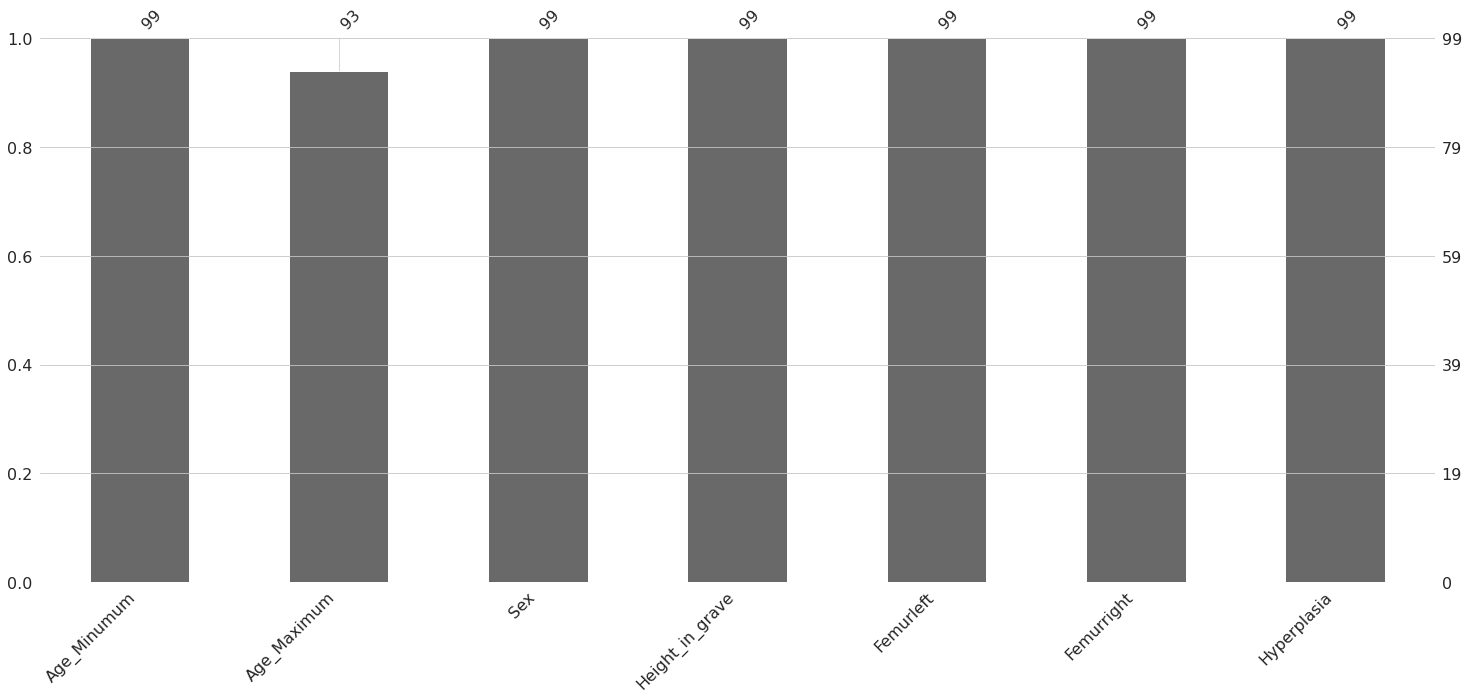

In [ ]:
msno.bar(bones_subset)


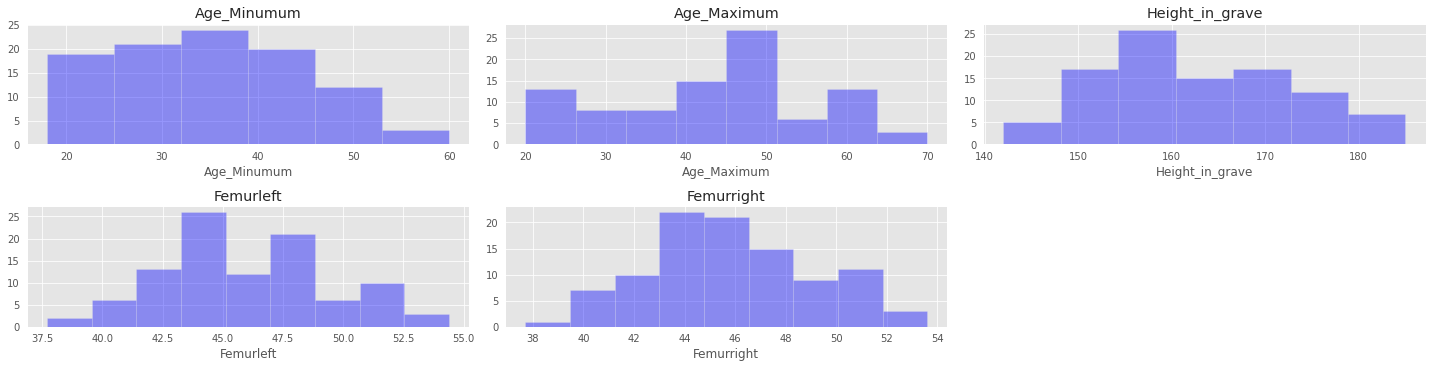

In [ ]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = male_subset.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))
for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                     sns.distplot(bones[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

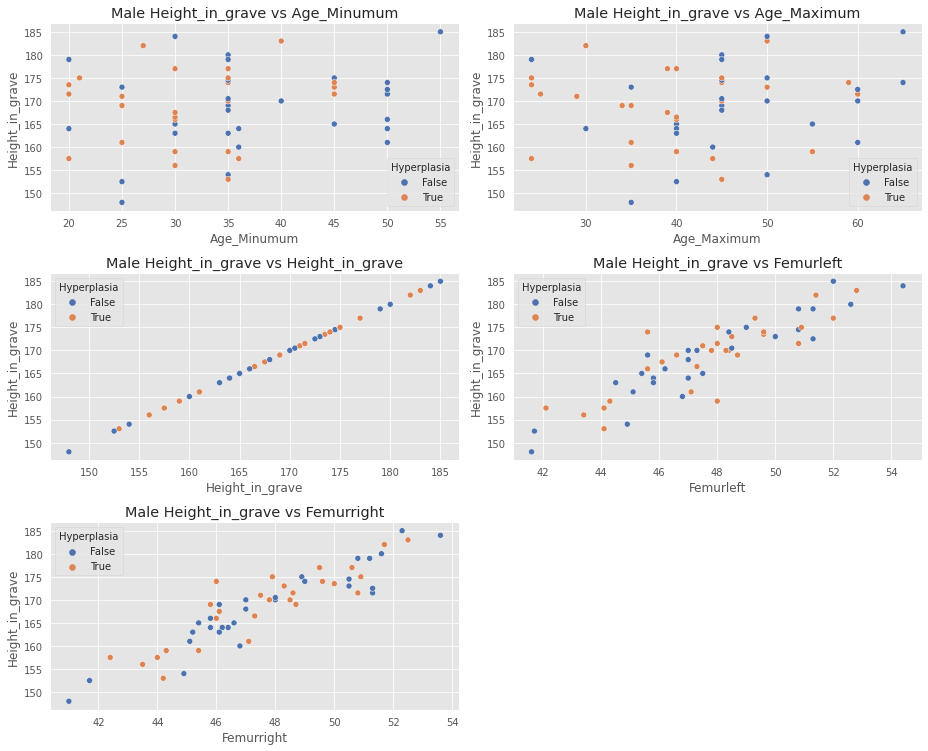

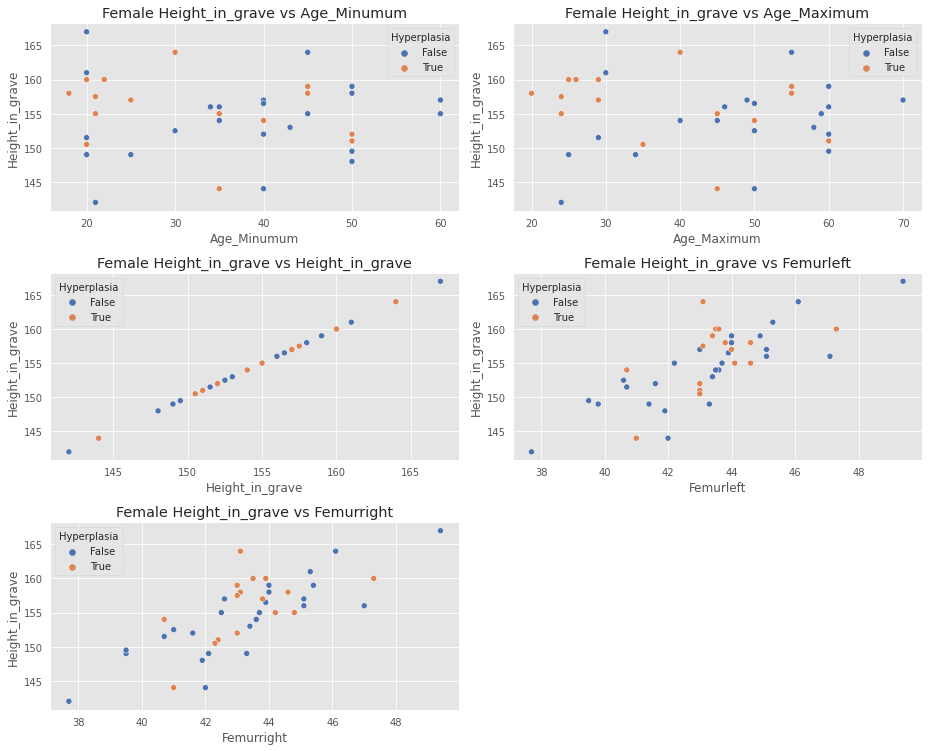

In [ ]:
numeric_columns= numeric_columns = male_subset.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(hue=male_subset['Hyperplasia'],palette='deep',x=bones[variable],y=male_subset['Height_in_grave']).set(title='Male Height_in_grave vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

numeric_columns= numeric_columns = female_subset.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(hue=female_subset['Hyperplasia'],palette='deep',x=bones[variable],y=female_subset['Height_in_grave']).set(title='Female Height_in_grave vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()